# TOPIC MODELLING TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING TOPIC MODELLING TECHNIQUES

We are going to compare topic/keyword extraction of LLM with LDA

In [1]:
import pandas as pd

# load the csv file into a pandas DataFrame
df = pd.read_csv('datasets/reuters_news/reuters21578_news.csv', low_memory=False)

# display a sample
df.head()

,Unnamed: 0,newID,oldID,title,author,data_split,isTopicsAvailable,document_date,dateline,people,places,orgs,exchanges,topic_body,topics
0,0,1,5544,BAHIA COCOA REVIEW,NaN,TRAIN,YES,26-FEB-1987 15:01:01.79,"SALVADOR, Feb 26 -",[],"['el-salvador', 'usa', 'uruguay']",[],[],Showers continued throughout the week in\nthe ...,['cocoa']
1,1,2,5545,STANDARD OIL <SRD> TO FORM FINANCIAL UNIT,NaN,TRAIN,NO,26-FEB-1987 15:02:20.00,"CLEVELAND, Feb 26 -",[],['usa'],[],[],Standard Oil Co and BP North America\nInc said...,NaN
2,2,3,5546,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN,NaN,TRAIN,NO,26-FEB-1987 15:03:27.51,"HOUSTON, Feb 26 -",[],['usa'],[],[],Texas Commerce Bancshares Inc's Texas\nCommerc...,NaN
3,3,4,5547,TALKING POINT/BANKAMERICA <BAC> EQUITY OFFER,"by Janie Gabbett, Reuters",TRAIN,NO,26-FEB-1987 15:07:13.72,"LOS ANGELES, Feb 26 -",[],"['usa', 'brazil']",[],[],BankAmerica Corp is not under\npressure to act...,NaN
4,4,5,5548,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,NaN,TRAIN,YES,26-FEB-1987 15:10:44.60,"WASHINGTON, Feb 26 -",[],['usa'],[],[],The U.S. Agriculture Department\nreported the ...,"['grain', 'wheat', 'corn', 'barley', 'oat', 's..."


In [2]:
# display the data types of each column and search for NaN values
print(df.columns)
print('----------------------------------------------------------------------------------------------------------------------')
print(df.describe())
print('----------------------------------------------------------------------------------------------------------------------')
print(df.isna().sum())
print('----------------------------------------------------------------------------------------------------------------------')
print(f'The total length of the datasets is: {len(df)}')

Index(['Unnamed: 0', 'newID', 'oldID', 'title', 'author', 'data_split',
       'isTopicsAvailable', 'document_date', 'dateline', 'people', 'places',
       'orgs', 'exchanges', 'topic_body', 'topics'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------
        Unnamed: 0        newID         oldID
count  21578.00000  21578.00000  21578.000000
mean   10788.50000  10789.50000  11257.664056
std     6229.17639   6229.17639   6400.922319
min        0.00000      1.00000      1.000000
25%     5394.25000   5395.25000   5905.250000
50%    10788.50000  10789.50000  11383.500000
75%    16182.75000  16183.75000  16777.750000
max    21577.00000  21578.00000  22173.000000
----------------------------------------------------------------------------------------------------------------------
Unnamed: 0               0
newID                    0
oldID                    0
title                  737
author          

In [3]:
# clean the dataset for NaN values in column 'topics'
df = df.dropna(subset=['topics', 'topic_body'])
print('----------------------------------------------------------------------------------------------------------------------')
print(df.isna().sum())
print('----------------------------------------------------------------------------------------------------------------------')
print(f'The total length of the datasets is: {len(df)}')

----------------------------------------------------------------------------------------------------------------------
Unnamed: 0              0
newID                   0
oldID                   0
title                   0
author               9888
data_split              0
isTopicsAvailable       0
document_date           0
dateline                0
people                  0
places                  0
orgs                    0
exchanges               0
topic_body              0
topics                  0
dtype: int64
----------------------------------------------------------------------------------------------------------------------
The total length of the datasets is: 10377


In [4]:
# take a sample of 1000 comments
df_sample = df[['newID', 'oldID', 'topic_body', 'topics']].sample(100)
df_sample = df_sample.reset_index(drop=True)
df_sample.head()

,newID,oldID,topic_body,topics
0,12052,280,The U.S. Has been promised a near\nmonopoly of...,"['corn', 'sorghum', 'grain']"
1,14849,4361,The Bundesbank accepted bids for 6.1\nbillion ...,"['money-fx', 'interest']"
2,17269,21891,President Reagan warned the U.S.\nCongress in ...,['trade']
3,6505,11416,"Shr two cts vs six cts\n Net 43,295 vs 147,...",['earn']
4,7080,11993,The Bank of England said it gave the\nmoney ma...,['money-fx']


### CREATE A KEYWORD EXTRACTION WITH LDA (LATENT DIRICHLET ALLOCATION)

In [5]:
from topic_modelling_techniques.lda_keyword_extraction import extract_keywords_for_all_comments

# Find the optimal number of keywords per comment, implement LDA and 
df_sample = extract_keywords_for_all_comments(df_sample, 'topic_body', min_topics=1, max_topics=10, find_optimal=(True, None))

# View the result
df_sample[['topic_body', 'lda_keywords', 'optimal_num_topics']]

,topic_body,lda_keywords,optimal_num_topics
0,The U.S. Has been promised a near\nmonopoly of...,[maize],1
1,The Bundesbank accepted bids for 6.1\nbillion ...,[billion],1
2,President Reagan warned the U.S.\nCongress in ...,[trade],1
3,"Shr two cts vs six cts\n Net 43,295 vs 147,...",[vs],1
4,The Bank of England said it gave the\nmoney ma...,[stg],1
...,...,...,...
95,Shr 1.51 dlr vs 1.62 dlr\n Net 28.6 mln vs ...,[billion],1
96,Qtrly div 26 cts Class A vs 12 cts\n Qtrly ...,[vs],1
97,"Shr two cts vs nine cts\n Net 86,469 vs 325...",[vs],1
98,The Indian State Trading Corporation\npurchase...,[000],1


### CALCULATE THE COSINE SIMILARITY BETWEEN LDA KEYWORDS AND ORIGINAL KEYWORDS

#### FIRSTLY CALCULATE THE EMBEDDINGS OF THE KEYWORDS

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
from utils.text_to_embeddings import calc_embeddings
from sklearn.decomposition import PCA

# modify the topics in order to be able to tokenize them in a transformer
df_sample['topics_str'] = df_sample['topics'].apply(lambda x: ' '.join(x))
df_sample['lda_keywords_str'] = df_sample['lda_keywords'].apply(lambda x: ' '.join(x))

# create an instance of PCA
pca = PCA(n_components=64)

# create embeddings for original keywords
embeddings_original_keywords =calc_embeddings(sentences=df_sample['topics_str'].to_list())

# Reduce the dimensionality of original keyword embeddings
reduced_data_original = pca.fit_transform(embeddings_original_keywords)
# add a column for embeddings
df_sample['original_keyword_embeddings'] = list(reduced_data_original)

# create embeddings for lda keywords
embeddings_lda_keywords = calc_embeddings(sentences=df_sample['lda_keywords_str'].to_list())
# Reduce the dimensionality of lda keyword embeddings
reduced_data_lda = pca.fit_transform(embeddings_lda_keywords)
# add a column for embeddings
df_sample['lda_keyword_embeddings'] = list(reduced_data_lda)

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Available device for the model is: 'cuda'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.78it/s]


Calculation of embeddings completed successfully


C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Available device for the model is: 'cuda'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 38.93it/s]


Calculation of embeddings completed successfully


#### MAKE THE COMPARISON BETWEEN LDA AND ORIGINAL KEYWORDS

In [7]:
from utils.benchmark_topic_modelling import compare_keyword_embeddings

# Now you can call this function and add the cosine similarity column to your DataFrame
df_sample, similarity_column_lda = compare_keyword_embeddings(df=df_sample,
                                       original_column='original_keyword_embeddings',
                                       column_for_comparison='lda_keyword_embeddings',
                                       final_column_suffix='lda'
                                      )
# plot a sample of similarity scores
df_sample[similarity_column_lda].sample(5)

62    0.102689
1    -0.005862
93   -0.113328
17    0.217546
51   -0.042208
Name: cosine_similarity_lda, dtype: float64

### CREATE A KEYWORD/TOPIC EXTRACTION WITH LLM'S (GPT 4o)

In [8]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_topics = load_chosen_prompt(prompt_name='prompt_for_keyword_extraction')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['language', 'comment']


In [9]:
from topic_modelling_techniques.llm_keyword_extraction import topic_extraction

text_col='topic_body'
language = 'English'
target_llm_column = 'llm_keywords'

# extract topics using llm's (openai gpt-4o)
df_sample = topic_extraction(df=df_sample,
                             text_col=text_col,
                             prompt_template=prompt_template_topics,
                             gpt_model='gpt-4o',
                             target_column_name=target_llm_column,
                             language=language)

  1%|██                                                                                                                                                                                                        | 1/100 [00:01<02:20,  1.42s/it]

extracted keywords: ["U.S.", "monopoly", "maize exports", "Spain", "European Community", "EC official", "agreement", "unpublished clause", "access", "sorghum", "traders", "EC Commission", "member states", "tender system", "import levies", "Spanish intervention board", "favourable terms", "Reuter"]


  2%|████                                                                                                                                                                                                      | 2/100 [00:02<02:02,  1.25s/it]

extracted keywords: ["Bundesbank", "bids", "securities repurchase pact", "fixed rate", "central bank", "liquidity", "funds", "market", "tightening of credit policy", "banks", "minimum reserve requirement", "security repurchase agreement", "open-market instrument", "market interest rates", "call money", "short-term fluctuations"]


  3%|██████                                                                                                                                                                                                    | 3/100 [00:03<02:08,  1.33s/it]

extracted keywords: ["President Reagan", "U.S. Congress", "protectionist trade legislation", "trade negotiations", "Japan", "tariffs", "Japanese products", "U.S.-Japanese pact", "semiconductors", "Japanese Prime Minister Yasuhiro Nakasone", "trade restrictions", "anti-protectionist policies", "trade retaliation"]


  4%|████████                                                                                                                                                                                                  | 4/100 [00:04<01:50,  1.15s/it]

extracted keywords: ["shr", "cts", "net", "revs", "reuter"]


  5%|██████████                                                                                                                                                                                                | 5/100 [00:05<01:38,  1.04s/it]

extracted keywords: ["Bank of England", "money market", "assistance", "afternoon session", "372 mln stg", "shortage", "central bank", "bank bills", "band one", "band two"]


  6%|████████████                                                                                                                                                                                              | 6/100 [00:06<01:44,  1.11s/it]

extracted keywords: ["California Microwave Inc", "non-recurring charges", "pre-tax earnings", "third quarter", "earnings from operations", "break-even range", "net earnings", "telecommunications products", "write-downs", "investment losses", "Argo Communications Corp", "Arizona-based communications electronics firm", "reduction in Sunnyvale work force", "nominal cash impact"]


  7%|██████████████▏                                                                                                                                                                                           | 7/100 [00:07<01:36,  1.03s/it]

extracted keywords: ["operating shares", "net income", "sales", "discontinued operations", "profit loss", "quarter", "year", "1986", "provision for loss", "disposal"]


  8%|████████████████▏                                                                                                                                                                                         | 8/100 [00:09<01:43,  1.13s/it]

extracted keywords: ["Revlon Group Inc", "Germaine Monteil", "Beecham Group PLC", "sale", "cosmetics business", "Diane von Furstenberg", "Lancaster beauty products", "royalty payment", "2.5 mln dlrs", "North and South America", "Far East"]


  9%|██████████████████▏                                                                                                                                                                                       | 9/100 [00:10<01:38,  1.09s/it]

extracted keywords: ["Glynwed International Plc", "Gallaher Ltd", "American Brands Inc", "acquisition", "thermoplastic pipework systems", "Durapipe U.K.", "Philmac", "strategic position", "net asset values", "debt", "Glynwed shares"]


 10%|████████████████████                                                                                                                                                                                     | 10/100 [00:11<01:50,  1.23s/it]

extracted keywords: ["Belgian Budget Minister", "Guy Verhofstadt", "plan", "sell off shares", "state-owned enterprises", "Sabena", "postal and telecommunications authority", "government sources", "25 billion francs", "revenue", "budget deficit", "Social Christian parties", "Belgium", "centre-right coalition", "cabinet meeting", "selloffs", "state investment company SNI", "Maritime Transport Authority", "Distrigaz", "CGER savings bank", "credit institutions", "privatisation", "Paul Henrion", "Le Soir", "REUTER"]


 11%|██████████████████████                                                                                                                                                                                   | 11/100 [00:12<01:37,  1.10s/it]

extracted keywords: ["Waste Management Inc", "Hart-Scott-Rodino", "takeover bid", "Chemlawn Corp", "waiting period", "termination", "27 dlrs a share", "selling business"]


 12%|████████████████████████                                                                                                                                                                                 | 12/100 [00:13<01:33,  1.07s/it]

extracted keywords: ["George Shultz", "Agriculture Department", "subsidized wheat", "Soviet Union", "wheat bonus", "President Reagan", "USDA", "export enhancement program", "European Common Market", "subsidized sales"]


 13%|██████████████████████████▏                                                                                                                                                                              | 13/100 [00:14<01:27,  1.01s/it]

extracted keywords: ["shr", "net", "revs", "avg shrs", "year", "1986 quarter", "investment tax credit"]



 14%|████████████████████████████▏                                                                                                                                                                            | 14/100 [00:15<01:25,  1.01it/s]

extracted keywords: ["Clayton and Dubilier Inc", "W. Atlee Burpee Co", "Wicks Capital Corp", "Bankers Trust New York Corp", "Burpee management", "ITT Corp", "O.M. Scott and Sons Co", "acquisition", "garden supply company"]


 15%|██████████████████████████████▏                                                                                                                                                                          | 15/100 [00:16<01:32,  1.09s/it]

extracted keywords: ["Botswana", "import ban", "meat products", "Zimbabwe", "foot and mouth disease", "outbreak", "Agriculture Minister Daniel Kwelagobe", "sterilised products", "canned animal products", "veterinary officials", "Insiza", "Matabeleland", "uncanned meat", "milk", "ham", "butter", "bacon", "European Community", "meat imports"]


 16%|████████████████████████████████▏                                                                                                                                                                        | 16/100 [00:17<01:23,  1.01it/s]

extracted keywords: ["earnings", "net profit", "revenue", "average shares", "restated results", "Deltona Corp", "investment", "equity method"]


 17%|██████████████████████████████████▏                                                                                                                                                                      | 17/100 [00:18<01:18,  1.05it/s]

extracted keywords: ["oil traders", "Exxon Corp", "Exxon U.S.A.", "price reduction", "contract barge", "heating oil", "New York harbor", "price decrease", "spot markets", "futures markets"]


 18%|████████████████████████████████████▏                                                                                                                                                                    | 18/100 [00:19<01:15,  1.08it/s]

extracted keywords: ["MacMillan Bloedel Ltd", "shareholders", "three-for-one stock split", "holders of record", "April 9", "stock trading", "split basis", "April 3", "regulatory approvals"]


 19%|██████████████████████████████████████▏                                                                                                                                                                  | 19/100 [00:19<01:13,  1.11it/s]

extracted keywords: ["Numac Oil and Gas Ltd", "operating performance", "1987", "1986 earnings", "crude oil", "pipeline capacity", "federal and provincial governments", "Reuter"]


 20%|████████████████████████████████████████▏                                                                                                                                                                | 20/100 [00:21<01:19,  1.01it/s]

extracted keywords: ["Nippon Mining Co", "Yukio Kasahara", "joint venture", "U.S. oil reserves", "oil exploration", "Dupont Co", "Conoco Inc", "Louisiana", "Gulf of Mexico", "Green Canyon Block 182", "oil prices", "OPEC", "Iran-Iraq war", "Saudi Arabia", "U.S. dollar", "dollar-yen relationship", "OPEC pricing"]


 21%|██████████████████████████████████████████▏                                                                                                                                                              | 21/100 [00:22<01:14,  1.05it/s]

extracted keywords: ["Shamrock Holdings", "California", "controlling interest", "preferred stock", "Nawara", "DBMS", "voting rights", "common stock", "shares", "company president", "director"]


 22%|████████████████████████████████████████████▏                                                                                                                                                            | 22/100 [00:22<01:09,  1.12it/s]

extracted keywords: ["shr loss", "net loss", "revenues", "average shares", "exchange rate", "Belgian francs", "U.S. dollar"]


 23%|██████████████████████████████████████████████▏                                                                                                                                                          | 23/100 [00:23<01:11,  1.08it/s]

extracted keywords: ["affiliated investment firms", "Securities and Exchange Commission", "Orient Express Hotels Inc", "stake", "shares", "FMR Corp", "Fidelity International Ltd", "common shares", "March 12", "April 8", "prices", "Reuter"]


 24%|████████████████████████████████████████████████▏                                                                                                                                                        | 24/100 [00:24<01:06,  1.15it/s]

extracted keywords: ["quarterly dividend", "two cents", "payment", "May 22", "record", "May 8", "Reuters"]


 25%|██████████████████████████████████████████████████▎                                                                                                                                                      | 25/100 [00:25<01:05,  1.14it/s]

extracted keywords: ["Webcor Electronics Inc", "technical default", "payment default", "revolving credit agreement", "lender", "debt", "third quarter net loss", "net loss", "Reuter"]


 26%|████████████████████████████████████████████████████▎                                                                                                                                                    | 26/100 [00:28<01:54,  1.54s/it]

extracted keywords: ["Soviet Union", "United States", "corn", "Agriculture Department", "European Community", "Canada", "grain imports", "USSR", "China", "Argentina", "Soviet winter crops", "Japan", "corn production", "USDA", "wheat", "export bonus wheat subsidy"]


 27%|██████████████████████████████████████████████████████▎                                                                                                                                                  | 27/100 [00:29<01:34,  1.30s/it]

extracted keywords: ["quarterly dividend", "1-1/2 cents", "March 31", "March 13", "Reuter"]


 28%|████████████████████████████████████████████████████████▎                                                                                                                                                | 28/100 [00:30<01:23,  1.16s/it]

extracted keywords: ["American Security Corp", "release", "pending merger", "Maryland National Corp", "stockholders", "October 10", "NASDAQ", "news announcement"]


 29%|██████████████████████████████████████████████████████████▎                                                                                                                                              | 29/100 [00:31<01:35,  1.35s/it]

extracted keywords: ["China", "sugar imports", "domestic output", "rising demand", "market predictions", "international sugar prices", "He Kang", "Ministry of Agriculture", "import", "domestic demand", "Customs figures", "Economic Information newspaper", "sugar cane", "beet", "sugar mills", "state purchasing prices", "farmers", "sugarcane", "refined sugar prices", "Fujian", "Guangdong", "Guangxi", "Yunnan", "sugar stocks", "Hong Kong trader", "world prices", "foreign exchange constraints", "state-owned mills", "Soviet equipment"]


 30%|████████████████████████████████████████████████████████████▎                                                                                                                                            | 30/100 [00:32<01:29,  1.28s/it]

extracted keywords: ["LAC Minerals Ltd", "underground mining", "exploration", "Lake Shore Mine", "Kirkland Lake", "Ontario", "surface exploration drilling", "earnings", "employees", "crown pillar", "gold", "surface drilling", "underground exploration"]


 31%|██████████████████████████████████████████████████████████████▎                                                                                                                                          | 31/100 [00:34<01:32,  1.35s/it]

extracted keywords: ["Taiwan", "China Shipbuilding Corp", "CSBC", "joint production agreements", "Japan", "ship repairing", "debt", "Louis Lo", "hulls", "Onomichi", "Japanese firms", "Mitsubishi Heavy Industries", "Ishikawajima-Harima Heavy Industries", "shipbuilding", "technology", "marketing", "Europe", "South Korea", "losses", "government support", "diversification", "pipes", "machinery", "income", "orders", "shipbuilding prospects", "overtonnage", "ship repairing outlook"]


 32%|████████████████████████████████████████████████████████████████▎                                                                                                                                        | 32/100 [00:35<01:31,  1.35s/it]

extracted keywords: ["Uganda", "Africa", "coffee producer", "Coffee Marketing Board", "CMB", "price drop", "robusta coffee", "quota formula", "International Coffee Organisation", "ICO", "Indonesian demands", "coffee exports", "foreign exchange earnings", "production rise", "rebel activity", "coffee export duties", "salaried manpower", "Dar es Salaam", "Tanzania", "Third World countries", "London coffee talks", "middlemen", "Paul Bomani", "Reuter"]


 33%|██████████████████████████████████████████████████████████████████▎                                                                                                                                      | 33/100 [00:37<01:35,  1.43s/it]

extracted keywords: ["Westpac Banking Corp", "Melbourne University", "Institute of Applied Economic and Social Research", "leading index", "Australian economic activity", "December", "index rise", "annualised", "chief economist Bob Graham", "upward trend", "tough mini-budget", "consumption spending", "balance of payments", "coincident index", "current recession", "real growth", "economic activity"]


 34%|████████████████████████████████████████████████████████████████████▎                                                                                                                                    | 34/100 [00:38<01:26,  1.30s/it]

extracted keywords: ["U.S. farmers", "federal payments cap", "government's agricultural programs", "General Accounting Office", "GAO", "farm reorganizations", "program costs", "Brian Crowley", "U.S. Agriculture Department", "House Agriculture Subcommittee", "Wheat", "Soybeans", "Feedgrains"]


 35%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                  | 35/100 [00:39<01:11,  1.11s/it]

extracted keywords: ["shr loss", "net profit", "revs", "preferred stock dividends"]


 36%|████████████████████████████████████████████████████████████████████████▎                                                                                                                                | 36/100 [00:39<01:06,  1.04s/it]

extracted keywords: ["earnings", "revenue", "shares", "loans", "deposits", "assets", "stock split", "adjustment", "Reuter"]


 37%|██████████████████████████████████████████████████████████████████████████▎                                                                                                                              | 37/100 [00:41<01:20,  1.28s/it]

extracted keywords: ["Williams Cos", "fourth quarter charge", "1986 net loss", "writedowns", "income", "revenues", "Agrico Chemical Co", "Freeport-Mcmoran Resource Partners", "antitrust review", "restructuring", "balance sheet", "future stability", "earnings growth", "Northwest Pipeline Corp", "Williams Natural Gas", "operating profit", "Williams Gas Marketing", "Williams Pipe Line Co"]


 38%|████████████████████████████████████████████████████████████████████████████▍                                                                                                                            | 38/100 [00:43<01:18,  1.26s/it]

extracted keywords: ["Bacro", "California", "board approval", "chairman", "Kenneth Donner", "President", "Michael Donner", "purchase", "outstanding shares", "leveraged transaction", "Donners", "44 percent", "vice chairman", "David Grutman", "family members", "28 percent", "stock", "offering price", "Reuter"]


 39%|██████████████████████████████████████████████████████████████████████████████▍                                                                                                                          | 39/100 [00:44<01:14,  1.21s/it]

extracted keywords: ["Hal Weiss", "Rocky Mount Undergarment Co Inc", "profit", "first quarter", "fiscal 1987", "sales", "net loss", "fourth quarter", "fiscal 1986", "net income", "management", "manufacturing operations", "financial condition", "credibility", "suppliers", "quarterly losses", "profitability"]


 40%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                        | 40/100 [00:45<01:13,  1.23s/it]

extracted keywords: ["International monetary officials", "currency stability", "Louvre accord", "dollar free-fall", "world capital markets", "economists", "currency traders", "Group of Seven", "exchange rate stability", "U.S. Treasury secretary", "James Baker", "West German money market rates", "Louvre pact", "currency markets", "U.S. stock markets", "Dow Jones Industrial Average", "U.S. Treasury bonds"]


 41%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                                                      | 41/100 [00:46<01:03,  1.08s/it]

extracted keywords: ["quarterly dividend", "three cents", "payment date", "April 30", "record date", "April 16", "Reuter"]


 42%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                    | 42/100 [00:47<01:07,  1.16s/it]

extracted keywords: ["Spain", "economic targets", "1987", "economy ministry", "internal demand", "inflation target", "Bank of Spain", "Mariano Rubio", "private consumption", "public consumption", "domestic demand", "imports", "export growth", "peseta", "GDP growth", "state spending", "Carlos Solchaga", "wage settlements", "unions", "employers", "CEOE"]


 43%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 43/100 [00:48<01:01,  1.07s/it]

extracted keywords: ["operating share profit", "net profit", "revenues", "average shares", "tax loss carryforwards", "discontinued operations", "1985 restated"]


 44%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 44/100 [00:49<01:05,  1.18s/it]

extracted keywords: ["Dean Foods Co", "earnings", "fourth quarter", "Kenneth Douglas", "analysts", "food processor", "sales", "billion", "projection", "third-quarter", "performance", "overall earnings", "tax reform act", "Howard Dean", "dairy acquisitions", "frozen vegetable acquisitions", "Ryan Milk", "Larsen Co", "Elgin Blenders Inc", "E.B.I. Foods Ltd", "licensing arrangements", "McDonalds Corp"]


 45%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                              | 45/100 [00:50<00:55,  1.02s/it]

extracted keywords: ["shr loss", "net loss", "revenue", "Reuter"]


 46%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                            | 46/100 [00:51<00:53,  1.01it/s]

extracted keywords: ["U.K. Retail sales", "February", "January", "Department of Trade and Industry", "sales index", "seasonally adjusted", "non-seasonally adjusted", "fourth quarter", "severe weather", "trading period"]


 47%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                          | 47/100 [00:52<00:57,  1.08s/it]

extracted keywords: ["Kansas", "Republican", "Pat Roberts", "Reagan administration", "export enhancement program", "eep", "subsidies", "Soviet Union", "House foreign agriculture subcommittee", "China", "Poland", "Moscow", "Secretary of State", "George Shultz", "Tom Kay", "U.S. Agriculture Department", "Foreign Agricultural Service", "USDA", "Congress", "wheat eep", "Richard Lyng", "Reuter"]


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                        | 48/100 [00:53<00:55,  1.06s/it]

extracted keywords: ["Seal Inc", "Ademco Ltd", "United Kingdom", "mounting equipment", "laminating equipment", "cash and stock", "2.6 million dollars", "exchange rates", "1.3 million dollars", "market price", "earnings targets", "acquired business"]


 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                      | 49/100 [00:54<00:53,  1.05s/it]

extracted keywords: ["operating loss", "net loss", "revenue", "operating profit", "net profit", "extraordinary tax charges", "pretax gain", "pension plan termination", "restructuring", "consolidation", "tax credit", "sale of foreign subsidiary"]


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 50/100 [00:55<00:52,  1.04s/it]

extracted keywords: ["U.S. Energy Department", "Snettisham Hydroelectric project", "Alaska Power Administration", "Alaskan electric utilities", "Anchorage", "state of Alaska", "privatization", "local utility", "DOE", "Congress", "Eklutna project"]


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 51/100 [00:56<00:52,  1.06s/it]

extracted keywords: ["Nova", "Canadian company", "Husky Oil Ltd", "government approval", "transaction", "Minister of Regional and Industrial Expansion", "Michel Cote", "Union Faith", "purchase", "Husky stake", "non-Canadian company", "deal", "private company", "Li Ka-Shing", "Hutchison", "Canadian Imperial Bank of Commerce"]


 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 52/100 [00:57<00:47,  1.01it/s]

extracted keywords: ["Japanese crushers", "5,000 tonnes", "Canadian rapeseed", "export business", "late May", "early June", "shipment", "trade sources"]


 53%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 53/100 [00:58<00:45,  1.03it/s]

extracted keywords: ["steel companies", "price increase", "USX Corp", "USS steelmaking division", "Armco Inc", "Bethlehem Steel Corp", "price hike", "plate products", "LTV Steel Co", "LTV Corp"]


 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 54/100 [00:59<00:41,  1.12it/s]

extracted keywords: ["stock split", "shareholder approval", "annual meeting", "1986 profit", "extraordinary items", "Reuter"]


 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 55/100 [01:00<00:44,  1.01it/s]

extracted keywords: ["Siebel Capital Management Inc", "California investment adviser", "Securities and Exchange Commission", "SEC", "1.3 mln CooperVision Inc common shares", "5.9 pct", "outstanding shares", "SEC filing", "acquire more stock", "influence management", "major changes", "business", "corporate structure", "net purchases", "163,200 CooperVision shares", "Jan. 1"]


 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 56/100 [01:01<00:42,  1.04it/s]

extracted keywords: ["Fidelcor Inc", "acquisition", "assets", "Bank of New England Corp", "Lazere Financial Corp", "undisclosed terms", "loan portfolio", "Miami office"]


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                      | 57/100 [01:02<00:38,  1.12it/s]

extracted keywords: ["profit", "net profit", "sales", "shr profit", "year", "dlrs", "mln", "Reuter"]


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 58/100 [01:03<00:42,  1.01s/it]

extracted keywords: ["Pacific Telesis Group", "Donald Guinn", "earnings growth", "capital spending", "regulatory uncertainties", "rate cases", "California Public Utility Commission", "revenue reduction", "rate hike", "transpacific telephone cable", "international consortium", "U.S. Department of Justice", "Bell operating companies", "long distance services", "commodity business", "strategic alliances", "acquisition talks"]


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 59/100 [01:04<00:41,  1.01s/it]

extracted keywords: ["Indian businessmen", "Australian businessmen", "memorandum of understanding", "two-way trade", "joint industrial ventures", "Indo-Australia Business Council", "India's exports", "trade balance", "steel", "coking coal", "cotton textiles"]


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 60/100 [01:05<00:38,  1.03it/s]

extracted keywords: ["International Tin Agreement", "sixth", "extension", "International Tin Council", "member states", "producer governments", "European Community", "EC", "Britain", "Council session", "delegate sources"]


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 61/100 [01:06<00:34,  1.12it/s]

extracted keywords: ["quarterly dividend", "nine cents", "pay April 30", "record April 6", "Reuters"]


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 62/100 [01:07<00:39,  1.04s/it]

extracted keywords: ["Oklahoma", "USDA crop report", "cold weather", "cattle deaths", "wheat growth", "rain", "fertilizer application", "weed spraying", "nitrogen deficiency", "insect activity", "southwest region", "wheat condition", "row crop activity", "topsoil moisture", "subsoil moisture", "fieldwork"]


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 63/100 [01:09<00:44,  1.21s/it]

extracted keywords: ["National Bank", "economic data", "1986", "Yugoslavia", "trade deficit", "inflation rate", "wages", "money supply", "dinar", "exports", "imports", "balance of payments surplus", "retail prices", "industrial producer prices", "cost of living", "personal incomes", "Prime Minister Branko Mikulic", "productivity", "M-1 money supply", "foreign currency savings", "dinar depreciation", "Swiss franc", "U.S. Dollar"]


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 64/100 [01:09<00:39,  1.10s/it]

extracted keywords: ["Applied Circuit Technology Inc", "ACT", "computer electronics business", "San Francisco", "sale price", "cash", "two year period", "close date", "March 31", "pharmaceuticals subsidiaries"]


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 65/100 [01:10<00:35,  1.01s/it]

extracted keywords: ["Shr", "net", "cts", "dlrs", "assets", "home federal savings", "loan association", "rockies", "Reuter"]


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 66/100 [01:12<00:37,  1.11s/it]

extracted keywords: ["Bundesbank", "Lothar Mueller", "money supply policy", "interest rates", "exchange rate", "monetary policy", "capital flows", "monetary targetting", "Bavaria", "economic context", "currency inflows", "money market rates", "liquidity", "non-banks", "U.S. economy", "stability policy", "central bank money stock", "current account surpluses", "capital imports", "monetary stocks"]


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 67/100 [01:12<00:34,  1.06s/it]

extracted keywords: ["Belgian industrial production", "seasonal adjustment", "calendar influences", "National Statistics Office", "production index", "February", "January", "provisional 108.8", "provisional 102.7", "base 1980"]


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 68/100 [01:13<00:32,  1.01s/it]

extracted keywords: ["proposed takeover offer", "Breakwater Resources Ltd", "Novamin", "share swap", "Novamin warrants", "conversion", "Breakwater common shares", "mineral exploration company", "proposal", "approval", "directors meeting"]


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 69/100 [01:14<00:29,  1.03it/s]

extracted keywords: ["New York State Electric and Gas Corp", "Corning Natural Gas Corp", "terminated", "acquisition", "uncertain regulatory climate", "depressed price", "Nine Mile Point Unit Two nuclear plant"]


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 70/100 [01:15<00:27,  1.07it/s]

extracted keywords: ["Qtr ended Jan 31", "Shr", "Net", "Revs", "Avg shrs", "Nine mths", "gains", "dispositions", "stock split", "Reuter"]


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 71/100 [01:16<00:26,  1.08it/s]

extracted keywords: ["Americus Trust", "Bristol-Myers", "tendered shares", "expiration date", "common stock price", "trust's termination price", "Americus Shareowner Service", "underlying stock", "Reuter"]


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 72/100 [01:17<00:24,  1.16it/s]

extracted keywords: ["LADD Furniture Inc", "acquisition", "Colony House Furniture Inc", "cash and notes", "Reuter"]


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 73/100 [01:18<00:24,  1.11it/s]

extracted keywords: ["Japan", "Finance Minister", "Kiichi Miyazawa", "U.S. Treasury Secretary", "James Baker", "Louvre Accord", "agreement", "stabilising currencies", "Paris", "news conference"]


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 74/100 [01:19<00:30,  1.17s/it]

extracted keywords: ["European Community", "farm trade policy", "Thailand's tapioca industry", "Ammar Siamwalla", "agro-economist", "Thailand Development Research Institute", "EC move", "tariff protection", "EC grains", "European market", "Thai tapioca", "EC quota", "tariff loophole", "preferential import duty", "tapioca farmers", "cereal prices", "world prices", "tapioca market", "dilemma", "commodity producers", "export subsidies"]


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 75/100 [01:20<00:27,  1.08s/it]

extracted keywords: ["Fluorocarbon Co", "acquisition", "Eaton Corp", "industrial polymer division", "70 million dollars", "Samuel Moore Group", "annual sales", "165 million dollars", "98 million dollars"]


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 76/100 [01:22<00:26,  1.12s/it]

extracted keywords: ["Swedish Finance Ministry", "British Petroleum Plc", "Gothenburg refinery", "Swedish petroleum industry competitiveness", "domestic oil consumption", "sulphur content regulations", "Norway's Mongstad facility", "Statoil", "de-sulphurisation plant", "investments", "capacity utilisation", "European refining industry", "Sweden's state-owned", "annual capacity", "4.7 mln tonnes"]


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 77/100 [01:22<00:23,  1.02s/it]

extracted keywords: ["Metrobanc", "federal savings bank", "shareholders", "approved", "merger", "Comerica Inc", "bank holding company", "regulatory approval"]


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 78/100 [01:23<00:21,  1.02it/s]

extracted keywords: ["M.A. Hanna Co", "PMS Consolidated", "purchase", "definitive agreement", "plastics industry", "colorants", "Somerset, N.J.", "revenues", "fiscal year"]


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 79/100 [01:24<00:20,  1.04it/s]

extracted keywords: ["Commodity Credit Corporation", "CCC", "export bonus", "barley", "Israel", "U.S. Agriculture Department", "Cargill, Inc", "commodities", "CCC stocks", "Export Enhancement Program"]


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 80/100 [01:25<00:17,  1.16it/s]

extracted keywords: ["shr loss", "net loss", "revs", "Reuter"]


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 81/100 [01:26<00:16,  1.13it/s]

extracted keywords: ["Security Capital Corp", "suspended quarterly cash dividend", "indefinitely", "board authorization withdrawn", "buy stock on open market", "operating losses", "Benjamin Franklin Savings Association", "Houston-based subsidiary"]


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 82/100 [01:28<00:21,  1.22s/it]

extracted keywords: ["Kuwait", "oil-reliant economy", "debt-ridden", "recovery", "OPEC", "oil prices", "gross domestic product", "GDP", "Iran-Iraq war", "oil export", "business confidence", "debt crisis", "stock market crash", "forward trading", "post-dated cheques", "informal credit system", "bad debt", "government guarantee", "financial sector", "OPEC quota", "oil production", "oil products", "downstream operations", "refining investment", "oil prices rebound", "domestic inflation", "government spending", "external accounts", "current account surplus", "petrodollar reserves", "budget deficit", "state reserves", "economic growth", "state spending", "productive sectors", "REUTER"]


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 83/100 [01:29<00:21,  1.27s/it]

extracted keywords: ["Martin T. Sosnoff", "Caesars World Inc", "tender offer", "Pratt Hotel Corp", "Southmark Corp", "joint venture", "gaming authorities", "regulatory review", "Sands Hotel and Casino", "Boardwalk Regency Hotel and Casino", "Resorts International Inc", "Donald Trump", "regulatory approvals", "board rejection", "shares", "interest"]


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 84/100 [01:30<00:20,  1.25s/it]

extracted keywords: ["Commodity Credit Corporation", "CCC", "bonus offers", "exporters", "hard red winter wheat", "soft red winter wheat", "Jordan", "U.S. Agriculture Department", "bonuses", "Louis Dreyfus Corp", "Continental Grain Co", "commodities", "CCC stocks", "U.S. wheat", "Export Enhancement Program", "December 31, 1986"]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 85/100 [01:32<00:20,  1.35s/it]

extracted keywords: ["U.S. trade laws", "House Ways and Means Trade Subcommittee", "trade surpluses", "foreign trading partners", "Democratic-sponsored trade legislation", "President Reagan", "retaliation", "quotas", "tariffs", "trade penalties", "Rep. Richard Gephardt", "trade deficit", "import relief", "export controls", "foreign competition", "research and development", "foreign trade barriers", "education and worker training", "collective bargaining", "worker rights", "minimum wage", "Clayton Yeutter", "import competition", "U.S. Trade Representative"]


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 86/100 [01:34<00:20,  1.44s/it]

extracted keywords: ["House", "bill", "Reagan administration", "Congress", "Mideast Gulf policy", "liberal Democrats", "conservative Republicans", "legislators", "President Reagan", "Senate", "Republican senator", "Mark Hatfield", "Appropriations Committee", "War Powers Act", "Kuwaiti tankers", "Congressional leaders", "U.S. flag", "Kuwaiti ships", "Iran-Iraq war", "U.S. military", "gulf", "American servicemen", "equipment", "war", "snake pit", "powder keg", "Toby Roth"]


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 87/100 [01:35<00:17,  1.31s/it]

extracted keywords: ["Jordan", "bids", "U.S. wheat", "soft wheat", "hard red winter wheat", "Export Bonus", "private export sources", "tender", "225,000 tonnes", "April through November shipment", "USDA", "Reuter"]


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 88/100 [01:36<00:14,  1.24s/it]

extracted keywords: ["Westpac Banking Corp", "New Zealand", "indicator lending rate", "percentage points", "April 7", "high costs", "funding", "wholesale deposit market", "uncertainty", "interest rates", "liquidity", "pressure", "trading banks", "base lending indicator rates"]


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 89/100 [01:37<00:12,  1.17s/it]

extracted keywords: ["Spartech Corp", "one for five reverse stock split", "registration statement", "Securities and Exchange Commission", "25 mln dlr offering", "convertible subordinated debentures", "1999", "Kidder Peabody and Co", "effective", "stock of record April eight"]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 90/100 [01:38<00:12,  1.21s/it]

extracted keywords: ["Arden Group Inc", "registration statement", "Securities and Exchange Commission", "issuer tender offers", "class A common stock", "8-1/4 pct debentures", "1989", "common stock holders", "30 dlrs cash", "35 dlrs principal", "13 pct subordinated debentures", "1997", "class B common stock", "cash payment", "proration"]


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 91/100 [01:39<00:11,  1.23s/it]

extracted keywords: ["European Community", "farm ministers", "compensation", "extensification scheme", "cereals", "beef", "veal", "wine", "output cuts", "profit", "environment", "farming areas", "alternative farming techniques", "Frans Andriessen", "income supports", "surplus production", "early retirement", "pensions", "revised proposals"]


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 92/100 [01:40<00:08,  1.10s/it]

extracted keywords: ["quarterly dividend", "seven cents", "pay date", "June 1", "record date", "May 4", "Reuters"]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 93/100 [01:41<00:07,  1.02s/it]

extracted keywords: ["operating loss", "net loss", "revenue", "profit", "extraordinary items", "discontinued operations", "fourth quarter", "1986", "1985"]


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 94/100 [01:42<00:05,  1.08it/s]

extracted keywords: ["operating loss", "net loss", "total income", "discontinued operations", "restated results", "Reuters"]


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 95/100 [01:43<00:04,  1.02it/s]

extracted keywords: ["Crazy Eddie Inc", "board of directors", "shareholder rights plan", "stockholder protection", "stockholder value", "management", "plan amendments", "continuing directors", "certificate of designation", "preferred stock", "employee stock ownership plan", "financial difficulties", "shareholders meeting"]


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 96/100 [01:43<00:03,  1.11it/s]

extracted keywords: ["Shr", "Net", "Assets", "Deposits", "Loans", "Reuter"]


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 97/100 [01:44<00:02,  1.16it/s]

extracted keywords: ["quarterly dividend", "Class A", "Class B", "payment", "record date", "Commonwealth Mortgage of America", "Reuters"]


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 98/100 [01:45<00:01,  1.20it/s]

extracted keywords: ["Shr", "cts", "Net", "Revs", "12 mths", "mln", "Reuter"]


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 99/100 [01:46<00:00,  1.06it/s]

extracted keywords: ["Indian State Trading Corporation", "vegetable oils", "import tender", "April shipments", "European rapeseed oil", "soyoil", "South American origin", "Malaysian rbd palm olein", "palm oil", "rbd olein", "Malaysian refiner", "dealer selling"]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:47<00:00,  1.07s/it]

extracted keywords: ["earnings report", "net income", "revenue", "tax credit", "real estate gains", "quarter", "year"]
--------------------------------------------------------------------------------------------------------------------------------


NameError: name 'df_topics_3' is not defined

In [10]:
df_sample['llm_keywords_str'] = df_sample['llm_keywords'].apply(lambda x: ' '.join(x))

# create embeddings for lda keywords
embeddings_llm_keywords = calc_embeddings(sentences=df_sample['llm_keywords_str'].to_list())
# Reduce the dimensionality of lda keyword embeddings
reduced_data_llm = pca.fit_transform(embeddings_llm_keywords)
# add a column for embeddings
df_sample['llm_keyword_embeddings'] = list(reduced_data_llm)


# Now you can call this function and add the cosine similarity column to your DataFrame
df_sample, similarity_column_lda = compare_keyword_embeddings(df=df_sample,
                                       original_column='original_keyword_embeddings',
                                       column_for_comparison='llm_keyword_embeddings',
                                       final_column_suffix='llm'
                                      )

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Available device for the model is: 'cuda'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.28it/s]

Calculation of embeddings completed successfully


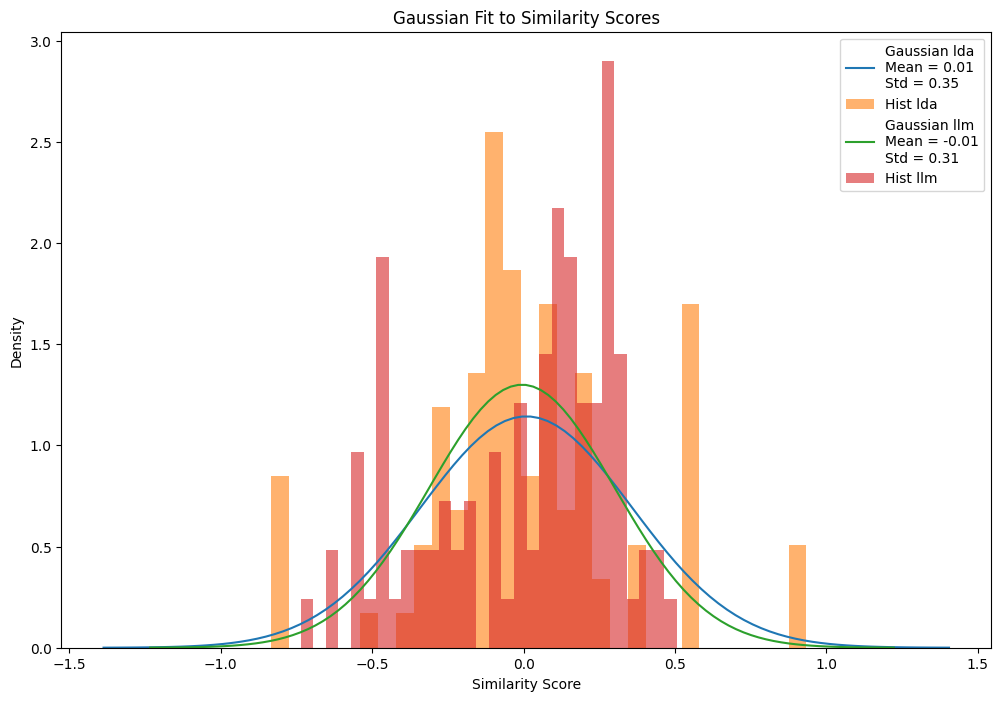

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian(df, similarity_columns):
    """
    Plot the similarity scores as a Gaussian distribution.
    
    Parameters:
    df (DataFrame): Input dataframe containing similarity scores.
    similarity_columns (str): Column name of the similarity scores.
    
    Returns:
    None: Plots the Gaussian distribution.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for column in similarity_columns:
        # Calculate the mean and standard deviation
        mean_similarity = df[column].mean()
        std_similarity = df[column].std()
    
        # Generate x values (range of similarity scores)
        x = np.linspace(mean_similarity - 4*std_similarity, mean_similarity + 4*std_similarity, 100)
        # Generate y values using the Gaussian formula (normal distribution)
        y = norm.pdf(x, mean_similarity, std_similarity)
        method_name = column.split('_')[2]  
        # Plot the Gaussian curve
        ax.plot(x, y, label=f'Gaussian {method_name}\nMean = {mean_similarity:.2f}\nStd = {std_similarity:.2f}')
        # Plot histogram of actual similarity values
        ax.hist(df[column], bins=30, density=True, alpha=0.6, label=f'Hist {method_name}')

    # Add labels and title
    plt.title("Gaussian Fit to Similarity Scores")
    ax.set_xlabel('Similarity Score')
    ax.set_ylabel('Density')
    # Show legend
    ax.legend() 
    # Show plot
    plt.show()

# Example usage:
plot_gaussian(df=df_sample, similarity_columns=['cosine_similarity_lda', 'cosine_similarity_llm'])

In [12]:
df_sample[['llm_keywords', 'topics']]

,llm_keywords,topics
0,"[U.S., monopoly, maize exports, Spain, Europea...","['corn', 'sorghum', 'grain']"
1,"[Bundesbank, bids, securities repurchase pact,...","['money-fx', 'interest']"
2,"[President Reagan, U.S. Congress, protectionis...",['trade']
3,"[shr, cts, net, revs, reuter]",['earn']
4,"[Bank of England, money market, assistance, af...",['money-fx']
...,...,...
95,"[Shr, Net, Assets, Deposits, Loans, Reuter]",['earn']
96,"[quarterly dividend, Class A, Class B, payment...",['earn']
97,"[Shr, cts, Net, Revs, 12 mths, mln, Reuter]",['earn']
98,"[Indian State Trading Corporation, vegetable o...","['veg-oil', 'rape-oil', 'palm-oil']"
